In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np

In [2]:
df = pd.read_csv('../data/processed/olx_cars_cleaned.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3375 entries, 0 to 3374
Data columns (total 72 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   url                                3375 non-null   object 
 1   title_list                         3375 non-null   object 
 2   color_list                         3274 non-null   object 
 3   description                        3375 non-null   object 
 4   modelo                             3375 non-null   object 
 5   marca                              3375 non-null   object 
 6   tipo_de_veículo                    3053 non-null   object 
 7   combustível                        3304 non-null   object 
 8   câmbio                             3305 non-null   object 
 9   direção                            3255 non-null   object 
 10  cor                                3325 non-null   object 
 11  possui_kit_gnv                     3362 non-null   objec

In [13]:
px.histogram(df, x='price_clean', nbins=50, height=600, title='Distribution of Car Prices', marginal='box')

In [12]:
df['log_price'] = np.log(df['price_clean'])

px.histogram(df, x='log_price', nbins=50, height=600, title='Distribution of Log-Transformed Car Prices', marginal='box')

In [15]:
top_15_brands = df['marca'].value_counts().head(15).index

df_top15 = df[df['marca'].isin(top_15_brands)]

px.box(df_top15, y='marca', x='log_price', height=600, title='Distribution of Log-Transformed Car Prices by Top 15 Brands', category_orders={'marca': top_15_brands.tolist()})

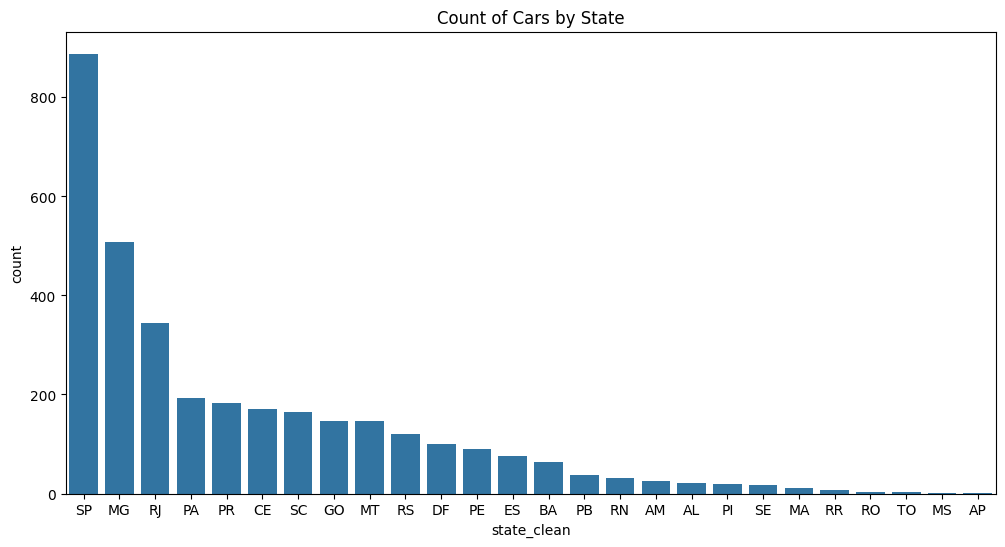

In [6]:
plt.figure(figsize=(12, 6))
sns.countplot(x='state_clean', data=df, order=df['state_clean'].value_counts().index)
plt.title('Count of Cars by State')
plt.show()

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

colunas_para_heatmap = [
    'log_price',
    
    'quilometragem_clean',
    'car_age',
    'km_per_year',
    'motor_clean',
    
    'teto_solar',
    'bancos_de_couro',
    'tracao_4x4',
    'blindado',
    'unico_dono'
]

correlacoes = df[colunas_para_heatmap].corr()

plt.figure(figsize=(12, 9))
sns.heatmap(
    correlacoes,
    annot=True,
    cmap='coolwarm',
    fmt='.2f'
)
plt.title('Heatmap de Correlação (Features Numéricas + Opcionais de Luxo)')
plt.show()

KeyError: "['car_age', 'km_per_year'] not in index"